In [127]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
def findAroundPoint(dataSet,p,eps):
    euclideanDis = np.sqrt(np.sum(np.square(trainData - p),axis=1))
    return np.nonzero(euclideanDis <= eps)[0]

In [129]:
trainData = array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]],dtype=float)
eps = 3
minPts = 2
corePoints = []
for i in range(trainData.shape[0]):
    p = trainData[i,:]
    aroundPoint = findAroundPoint(trainData,p,eps)
    if len(aroundPoint) >= minPts:
        corePoints.append(i)
print(corePoints)

borderPoints = []
noisePoints = []
for i in range(trainData.shape[0]):
    p = trainData[i,:]
    aroundPoint = findAroundPoint(trainData,p,eps)
    if len(aroundPoint) < minPts:
        # around points have intersection with core point
        if len(set(aroundPoint) & set(corePoints)) > 0:
            borderPoints.append(i)
        else:
            noisePoints.append(i)
print(borderPoints)
print(noisePoints)

[0, 2, 3, 4, 5, 7]
[]
[1, 6]


In [130]:
cluster = []
unChosedPoint = set([0,1,2,3,4,5,6,7])
number = 0
while True:
    if len(unChosedPoint) == 0:
        break;
    # arbitray select a point p
    import random
    number = random.sample(unChosedPoint, 1)[0]
    p = trainData[number,:]
    aroundPoint = findAroundPoint(trainData,p,eps).tolist()
    # try to find density rechable
    densReach = []
    for ap in aroundPoint :
        if ap == number:
            continue
        aroundPoint_ap = findAroundPoint(trainData,trainData[ap,:],eps).tolist()
        densityReachP = (set(aroundPoint_ap) - set([number]) - set([ap]))  & set(corePoints)
#         for i in densityReachP:
#             densReach.append(i)
        densReach = densReach + list(densityReachP)
    aroundPoint = list(set(aroundPoint + densReach))
    if number in corePoints:
        #If pis a corepoint, a clusteris formed
        cluster.append(aroundPoint)
        unChosedPoint = unChosedPoint - set(aroundPoint)
    else:
        unChosedPoint = unChosedPoint - set([number])
    number = number + 1
cluster

[[2, 4, 5], [0, 3, 7]]

[ 2.  0.  1.  2.  1.  1.  0.  2.]


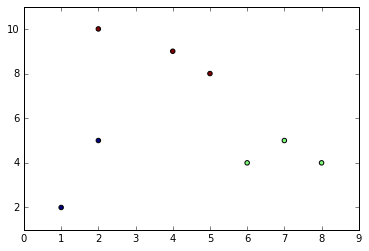

In [131]:
color = np.zeros(8)
for i in range(len(cluster)):
    for point in cluster[i]:
        color[point] =  i + 1
print(color)
plt.scatter(trainData[:,0],trainData[:,1],c = color)
plt.show()